<a href="https://colab.research.google.com/github/codened/DataStorm-4.0/blob/main/stormingRound/DataStorm_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.dtreeg" alt="Open In Colab"/></a>

Path 
stormingRound/DataStorm_4_0.ipynb

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data Sets

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

#### Viewing Dataframe

In [3]:
rawHisTransDF.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [4]:
rawStoreInfDF.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


# Data Pre Processing

### Fixing Data

In [5]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [6]:
# Performing left join
merged_df = pd.merge(rawHisTransDF, rawStoreInfDF, on='shop_id', how='left')

In [7]:
rawHisTransDF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_description,438046,37,GINGER BEER 1.5L,59864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,473974,62,2021-12-11,15125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice_id,467654.0,NaN,NaN,NaN,1996684.006321,1344594.276666,17.0,1032113.75,2032996.0,3032568.25,8331754.0
customer_id,473974,191636,RX33,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shop_id,473974,124,SHOP043,6631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_price,473974.0,NaN,NaN,NaN,206.689734,166.764732,35.0,100.0,200.0,220.0,17400.0
quantity_sold,473974.0,NaN,NaN,NaN,1.925506,1.634535,-1.0,1.0,2.0,2.0,101.0


In [8]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [9]:
merged_df.dropna(subset=['item_description','invoice_id'], inplace=True)

In [10]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description        0
transaction_date        0
invoice_id              0
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        79471
dtype: int64


In [11]:
merged_df.drop_duplicates(inplace=True)

### Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

In [13]:
merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\2624828608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [14]:
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'High': 3, 'Moderate': 2, 'Low': 1})
merged_df['shop_profile'] = merged_df['shop_profile'].fillna(0.0).astype(int)
merged_df['invoice_id'] = merged_df['invoice_id'].astype(int)

In [15]:
merged_df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2
1,GINGER BEER 1.5L,2021-10-17,371,91334,112,220,2,668,2
2,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2
3,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206,176899,3,60,2,810,3
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754,52159,127,35,2,848,3
473822,GINGER BEER 1.5L,2021-10-16,8304807,95280,127,220,1,848,3
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570,8748,127,35,1,848,3


In [16]:
# # merged_df order by item_price
# merged_df.sort_values(by=['item_price'], inplace=True)

In [17]:
# merged_df

In [18]:
print(merged_df[merged_df['quantity_sold'] == 0])

                   item_description transaction_date  invoice_id  customer_id  \
54                 CREAM SODA 500ML       2021-12-09       24423        70620   
103                      SODA 500ML       2021-10-31       31745       177679   
230                 CREAM SODA 1.5L       2021-12-10       52904        26069   
273                      NECTO 1.5L       2021-11-12       59336       154510   
465                  LEMONADE 500ML       2021-11-10      111021       100682   
...                             ...              ...         ...          ...   
473258             CREAM SODA 500ML       2021-12-04     4363428       108185   
473355                   SODA 500ML       2021-11-21     4479312       154031   
473412  BOTTLED DRINKING WATER 1.5L       2021-11-13     4603720        68657   
473462              TONIC PET 500ML       2021-12-10     4653601        63057   
473500      FIT O MIXED FRUIT 200ML       2021-10-27     4798624        37513   

        shop_id  item_price

In [19]:
merged_df = merged_df[merged_df['quantity_sold'] != 0]

In [20]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2
1,GINGER BEER 1.5L,2021-10-17,371,91334,112,220,2,668,2
2,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2
3,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206,176899,3,60,2,810,3
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754,52159,127,35,2,848,3
473822,GINGER BEER 1.5L,2021-10-16,8304807,95280,127,220,1,848,3
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570,8748,127,35,1,848,3


# Feature Engineering

### Feature Creation

In [21]:
merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\2634474984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']


#### creating Avarage daily sales for each shop

In [22]:
merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


C:\Users\gw\AppData\Local\Temp\ipykernel_14288\1755121770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


In [23]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375
1,GINGER BEER 1.5L,2021-10-17,371,91334,112,220,2,668,2,440,23290
2,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625
3,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625
4,STRAWBERRY MILK 180ML,2021-10-23,1310,38862,112,210,5,668,2,1050,19600
...,...,...,...,...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206,176899,3,60,2,810,3,120,27765
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754,52159,127,35,2,848,3,70,33180
473822,GINGER BEER 1.5L,2021-10-16,8304807,95280,127,220,1,848,3,220,33180
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570,8748,127,35,1,848,3,35,109150


In [24]:
subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\1990627187.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]


In [25]:
# Group by shop id and calculate mean of daily_sales column
avg_sales = merged_df.groupby('shop_id')['Daily_Sales'].mean().reset_index()

# Merge the average sales data back into the original dataframe
merged_df = merged_df.merge(avg_sales, on='shop_id', suffixes=('', '_avg'))

# Print the updated dataframe
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913


#### Full revinew

In [26]:
merged_df['revnew'] = merged_df.groupby(['shop_id'])['full_price'].transform('sum')

In [27]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580


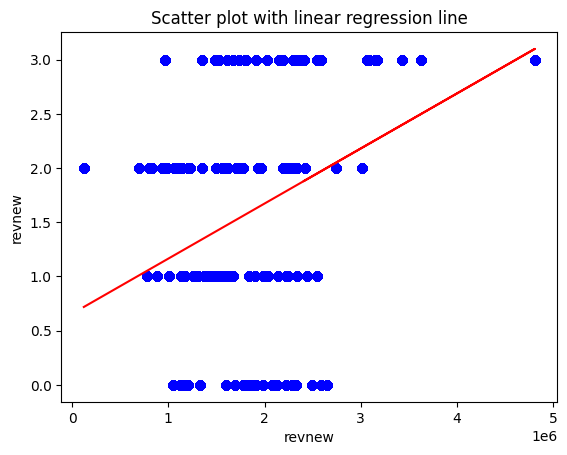

In [28]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='revnew'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Revnew per sqr feet of land

In [29]:
merged_df['rev_per_sqfeet'] = (merged_df['revnew'] / merged_df['shop_area_sq_ft']).round().astype(int)


In [30]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907


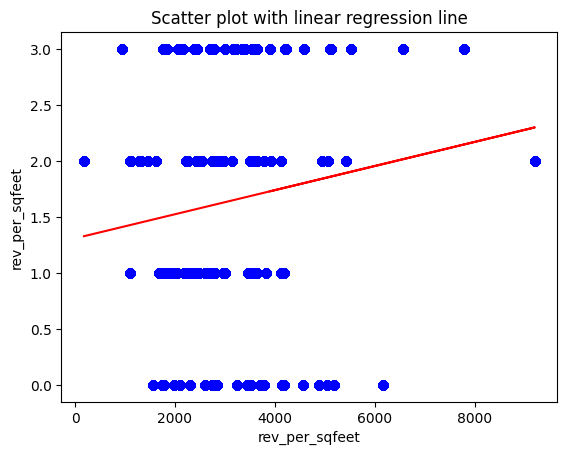

In [31]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='rev_per_sqfeet'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Avarage sold item types per each shop 

In [33]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_items_sold = merged_df.groupby(['shop_id', 'transaction_date'])['item_description'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_items_sold = daily_items_sold.groupby('shop_id')['item_description'].mean().reset_index()

# rename the columns
avg_daily_items_sold.columns = ['shop_id', 'avd_daily_items_types_sold']
# convert float column to integers
avg_daily_items_sold['avd_daily_items_types_sold'] = avg_daily_items_sold['avd_daily_items_types_sold'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_items_sold, on='shop_id', how='left')

In [34]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22


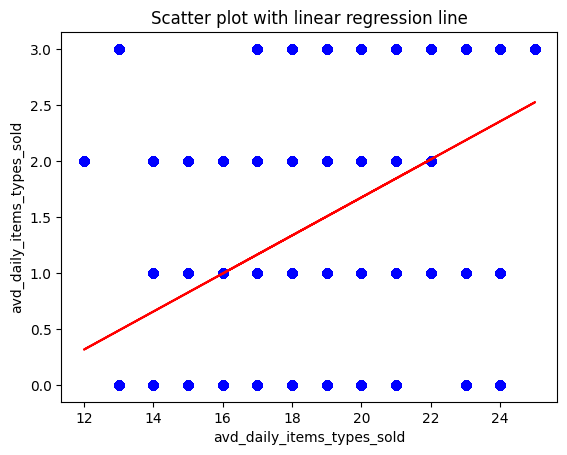

In [35]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_items_types_sold'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Avarage Daily Transactions per each shop

In [36]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_trans = merged_df.groupby(['shop_id', 'transaction_date'])['invoice_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_trans = daily_trans.groupby('shop_id')['invoice_id'].mean().reset_index()

# rename the columns
avg_daily_trans.columns = ['shop_id', 'avd_daily_transctions']
# convert float column to integers
avg_daily_trans['avd_daily_transctions'] = avg_daily_trans['avd_daily_transctions'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_trans, on='shop_id', how='left')

In [37]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49


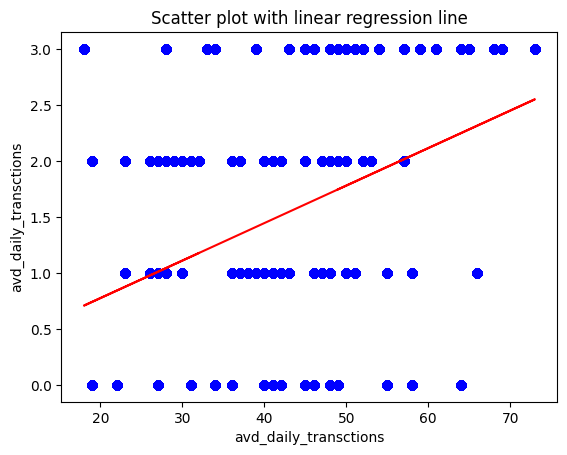

In [38]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_transctions'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Average number of custemers per day

In [39]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_custemers = merged_df.groupby(['shop_id', 'transaction_date'])['customer_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_custemers = daily_custemers.groupby('shop_id')['customer_id'].mean().reset_index()

# rename the columns
avg_daily_custemers.columns = ['shop_id', 'avd_daily_custemers']
# convert float column to integers
avg_daily_custemers['avd_daily_custemers'] = avg_daily_custemers['avd_daily_custemers'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_custemers, on='shop_id', how='left')

In [40]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49,48
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49,48
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49,48
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49,48


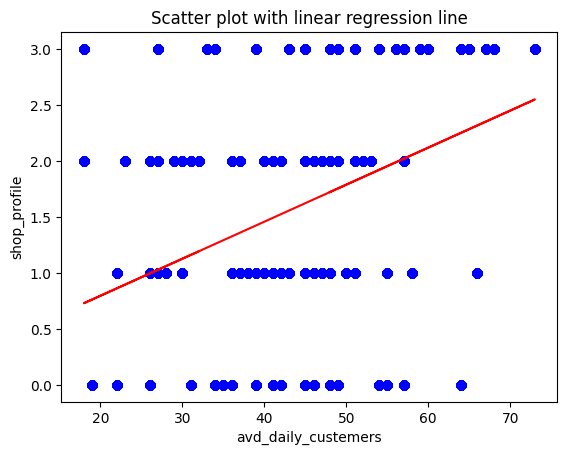

In [41]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_custemers'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(y)

# display plot
plt.show()

#### customers per sq feet

In [42]:
merged_df['cus_per_sqft']=merged_df['avd_daily_custemers']/merged_df['shop_area_sq_ft']

In [43]:
merged_df['cus_per_sqft']

0         0.047198
1         0.047198
2         0.047198
3         0.047198
4         0.047198
            ...   
394475    0.077796
394476    0.077796
394477    0.077796
394478    0.077796
394479    0.077796
Name: cus_per_sqft, Length: 394480, dtype: float64

#### Persentage of Avarage number of time the same customer returning for the same shop

In [44]:
# calculate the number of times each customer visited each shop
visits = merged_df.groupby(['customer_id', 'shop_id'])['transaction_date'].count()
# calculate the average number of visits per customer per shop
avg_visits = visits.groupby(['shop_id']).mean()*100

avg_visits=avg_visits.round().astype(int)
# create a new DataFrame with the average visits
avg_visits_df = avg_visits.reset_index().rename(columns={'transaction_date': 'avg_visits'})

# merge the new DataFrame with the original DataFrame to add the average visits column
merged_df = pd.merge(merged_df, avg_visits_df, on=['shop_id'])

In [45]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,0.047198,127
1,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32,0.047198,127
2,CREAM SODA 1L,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32,0.047198,127
3,GINGER BEER 1.5L,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,0.047198,127
4,GINGER BEER 1.5L,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32,0.047198,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,FIT O ORANGE 1L,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49,48,0.077796,157
394476,NECTO 1.5L,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49,48,0.077796,157
394477,GINGER BEER 400ML,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49,48,0.077796,157
394478,FIT O ORANGE 200ML,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49,48,0.077796,157


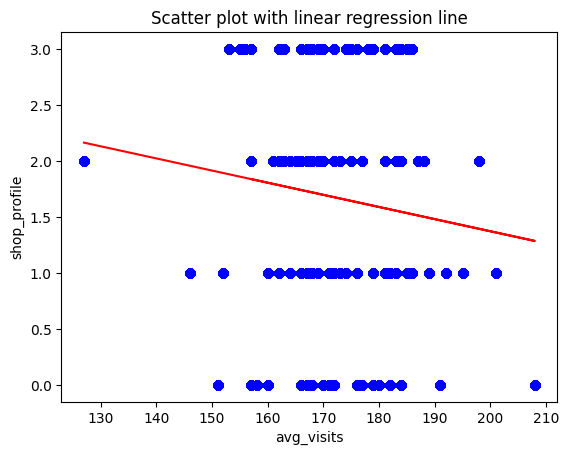

In [46]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avg_visits'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(y)

# display plot
plt.show()

#### Avg price for each item in each shop

In [47]:
# for (shop_id, item_description), item_price in merged_df.groupby(['shop_id', 'item_description'])['item_price']:
#     print(f"shop_id: {shop_id}, Item type: {item_description}")
#     print(item_price)
    


In [48]:
# Calculate average price for each item type sold by each shop
avg_prices = merged_df.groupby(['shop_id', 'item_description'])['item_price'].mean().reset_index()

# Rename 'price' column to 'avg_price'
avg_prices = avg_prices.rename(columns={'item_price': 'avg_price'})

# Merge the average prices back into the original DataFrame
merged_df = pd.merge(merged_df, avg_prices, on=['shop_id', 'item_description'])

In [49]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,0.047198,127,220.0
1,ORANGE BARLEY 1.5L,2021-12-10,54,97284,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,0.047198,127,220.0
2,ORANGE BARLEY 1.5L,2021-12-10,2000071,144334,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,0.047198,127,220.0
3,ORANGE BARLEY 1.5L,2021-12-12,3000280,147572,8,220,1,678,2,220,8530,37040.173913,121225,179,16,32,32,0.047198,127,220.0
4,ORANGE BARLEY 1.5L,2021-12-12,322,88285,8,220,2,678,2,440,8530,37040.173913,121225,179,16,32,32,0.047198,127,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,ORANGE CRUSH 1L,2021-11-05,7023229,166913,72,150,1,617,3,150,17725,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0
394476,ORANGE CRUSH 1L,2021-11-18,1478119,35014,72,150,1,617,3,150,14250,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0
394477,ORANGE CRUSH 1L,2021-11-26,3400566,39990,72,150,2,617,3,300,25505,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0
394478,ORANGE CRUSH 1L,2021-11-20,4286907,113583,72,150,1,617,3,150,30320,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0


#### Number of items each item sold by each shop

In [50]:
# calculate the number of times each item sold by each shop
Num_of_times = merged_df.groupby(['item_description', 'shop_id'])['quantity_sold'].transform('sum')

Num_of_times=Num_of_times.to_frame()

Num_of_times = Num_of_times.rename(columns={'quantity_sold': 'num_of_times_item_sold'})


# concatenate the dataframes
merged_df = pd.concat([merged_df, Num_of_times], axis=1)


In [51]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,...,37040.173913,121225,179,16,32,32,0.047198,127,220.0,7
1,ORANGE BARLEY 1.5L,2021-12-10,54,97284,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,0.047198,127,220.0,7
2,ORANGE BARLEY 1.5L,2021-12-10,2000071,144334,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,0.047198,127,220.0,7
3,ORANGE BARLEY 1.5L,2021-12-12,3000280,147572,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,0.047198,127,220.0,7
4,ORANGE BARLEY 1.5L,2021-12-12,322,88285,8,220,2,678,2,440,...,37040.173913,121225,179,16,32,32,0.047198,127,220.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,ORANGE CRUSH 1L,2021-11-05,7023229,166913,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0,11
394476,ORANGE CRUSH 1L,2021-11-18,1478119,35014,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0,11
394477,ORANGE CRUSH 1L,2021-11-26,3400566,39990,72,150,2,617,3,300,...,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0,11
394478,ORANGE CRUSH 1L,2021-11-20,4286907,113583,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,0.077796,157,150.0,11


#### Total quantity sold

In [52]:
tot_quantity_sold= merged_df.groupby(['shop_id'])['quantity_sold'].transform('sum')

tot_quantity_sold=tot_quantity_sold.to_frame()

tot_quantity_sold = tot_quantity_sold.rename(columns={'quantity_sold': 'tot_quantity_sold'})

# concatenate the dataframes
merged_df = pd.concat([merged_df, tot_quantity_sold], axis=1)

In [53]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,...,121225,179,16,32,32,0.047198,127,220.0,7,438
1,ORANGE BARLEY 1.5L,2021-12-10,54,97284,8,220,1,678,2,220,...,121225,179,16,32,32,0.047198,127,220.0,7,438
2,ORANGE BARLEY 1.5L,2021-12-10,2000071,144334,8,220,1,678,2,220,...,121225,179,16,32,32,0.047198,127,220.0,7,438
3,ORANGE BARLEY 1.5L,2021-12-12,3000280,147572,8,220,1,678,2,220,...,121225,179,16,32,32,0.047198,127,220.0,7,438
4,ORANGE BARLEY 1.5L,2021-12-12,322,88285,8,220,2,678,2,440,...,121225,179,16,32,32,0.047198,127,220.0,7,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,ORANGE CRUSH 1L,2021-11-05,7023229,166913,72,150,1,617,3,150,...,2410580,3907,22,49,48,0.077796,157,150.0,11,6888
394476,ORANGE CRUSH 1L,2021-11-18,1478119,35014,72,150,1,617,3,150,...,2410580,3907,22,49,48,0.077796,157,150.0,11,6888
394477,ORANGE CRUSH 1L,2021-11-26,3400566,39990,72,150,2,617,3,300,...,2410580,3907,22,49,48,0.077796,157,150.0,11,6888
394478,ORANGE CRUSH 1L,2021-11-20,4286907,113583,72,150,1,617,3,150,...,2410580,3907,22,49,48,0.077796,157,150.0,11,6888


#### Average Item Price Per Shop

In [54]:
merged_df['avg_itm_pp_Shop'] = (merged_df['revnew'] / merged_df['tot_quantity_sold']).astype(int)

In [55]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,...,179,16,32,32,0.047198,127,220.0,7,438,276
1,ORANGE BARLEY 1.5L,2021-12-10,54,97284,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.0,7,438,276
2,ORANGE BARLEY 1.5L,2021-12-10,2000071,144334,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.0,7,438,276
3,ORANGE BARLEY 1.5L,2021-12-12,3000280,147572,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.0,7,438,276
4,ORANGE BARLEY 1.5L,2021-12-12,322,88285,8,220,2,678,2,440,...,179,16,32,32,0.047198,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,ORANGE CRUSH 1L,2021-11-05,7023229,166913,72,150,1,617,3,150,...,3907,22,49,48,0.077796,157,150.0,11,6888,349
394476,ORANGE CRUSH 1L,2021-11-18,1478119,35014,72,150,1,617,3,150,...,3907,22,49,48,0.077796,157,150.0,11,6888,349
394477,ORANGE CRUSH 1L,2021-11-26,3400566,39990,72,150,2,617,3,300,...,3907,22,49,48,0.077796,157,150.0,11,6888,349
394478,ORANGE CRUSH 1L,2021-11-20,4286907,113583,72,150,1,617,3,150,...,3907,22,49,48,0.077796,157,150.0,11,6888,349


# Visualizing

In [56]:
# create a new smaller dataframe by grouping all the rows by shop_id and taking the mean of each column exept shop profile column to the corresponding shop id column
detailDF=merged_df.groupby('shop_id').mean().reset_index().drop(['shop_profile','invoice_id','Daily_Sales'], axis=1)

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\1293364985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  detailDF=merged_df.groupby('shop_id').mean().reset_index().drop(['shop_profile','invoice_id','Daily_Sales'], axis=1)


In [57]:
detailDF

,shop_id,customer_id,item_price,quantity_sold,shop_area_sq_ft,full_price,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,1,89550.816290,223.882283,1.919738,580.0,596.275268,19624.777051,1002935.0,1729.0,14.0,23.0,22.0,0.037931,166.0,223.882283,212.304400,3229.0,310.0
1,2,92924.378372,240.564217,1.977976,637.0,654.618906,51150.466469,2645315.0,4153.0,20.0,55.0,55.0,0.086342,170.0,240.564217,548.119030,7993.0,330.0
2,3,93946.891048,219.178082,1.893915,810.0,531.363492,32080.320166,1667950.0,2059.0,19.0,43.0,43.0,0.053086,162.0,219.178082,318.312838,5945.0,280.0
3,4,90487.151701,215.287415,1.877891,516.0,483.134354,27385.164966,1420415.0,2753.0,19.0,40.0,40.0,0.077519,181.0,215.287415,352.518707,5521.0,257.0
4,5,90305.181088,211.677074,1.782337,617.0,478.801665,29554.439489,1610210.0,2610.0,20.0,46.0,45.0,0.072934,171.0,211.677074,340.641094,5994.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,88437.324614,210.532105,1.828181,735.0,490.719382,15805.588585,825390.0,1123.0,14.0,23.0,23.0,0.031293,163.0,210.532105,177.755648,3075.0,268.0
120,124,87807.537370,219.699945,2.012821,606.0,695.094108,44868.428805,2548215.0,4205.0,22.0,48.0,48.0,0.079208,174.0,219.699945,328.924441,7379.0,345.0
121,125,91741.353933,217.254213,2.285815,1028.0,678.771067,19419.339888,966570.0,940.0,13.0,18.0,18.0,0.017510,183.0,217.254213,158.360955,3255.0,296.0
122,126,89545.881243,211.870144,2.017758,328.0,600.508694,29741.977432,1623175.0,4949.0,18.0,37.0,37.0,0.112805,170.0,211.870144,263.272660,5454.0,297.0


In [58]:
# creat a dataframe using avd_daily_custemers,cus_per_sqft,shop_area_sq_ft,Daily_Sales_avg,avd_daily_transctions columns only

detailDF=detailDF[['shop_id','avd_daily_custemers','cus_per_sqft','shop_area_sq_ft','Daily_Sales_avg','avd_daily_transctions']]





In [59]:
# # draw a scatter plot for detailDF every column combinations

# # Create scatter plot grid
# sns.pairplot(detailDF, kind="scatter")

# # Display the plot
# plt.show()


C:\Users\gw\AppData\Local\Temp\ipykernel_14288\3510410926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


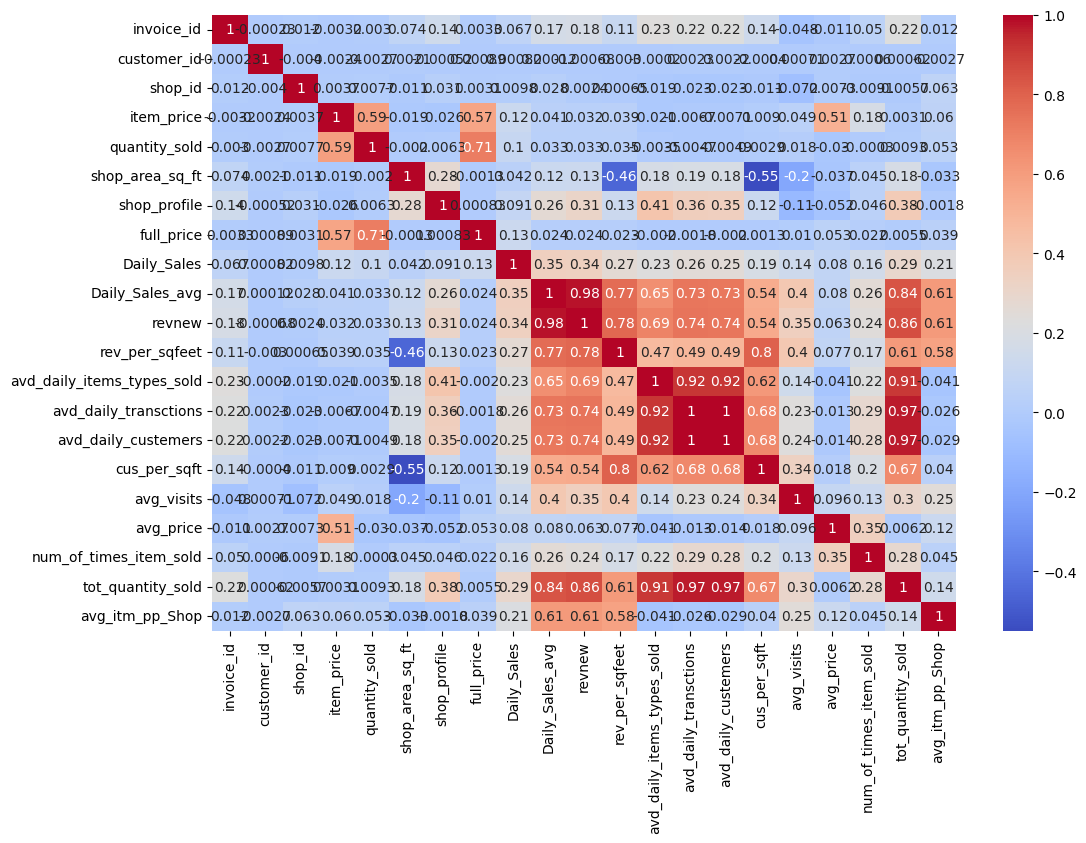

In [60]:
# Create correlation matrix
corr = merged_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [61]:
# Drop highly co related features
cleanedDF = merged_df.drop(['avd_daily_custemers','transaction_date','revnew','item_price','item_description','quantity_sold','full_price','customer_id','avd_daily_transctions'], axis=1)

In [62]:
# # Drop all low MI features
# cleanedDF = cleanedDF.drop(['avd_daily_items_types_sold','num_of_times_item_sold','avg_visits','shop_area_sq_ft','invoice_id','avg_itm_pp_Shop'], axis=1)


In [63]:
# drop duplicates
cleanedDF.drop_duplicates(inplace=True)

In [64]:
cleanedDF

,invoice_id,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,147,8,678,2,65375,37040.173913,179,16,0.047198,127,220.0,7,438,276
1,54,8,678,2,27435,37040.173913,179,16,0.047198,127,220.0,7,438,276
2,2000071,8,678,2,27435,37040.173913,179,16,0.047198,127,220.0,7,438,276
3,3000280,8,678,2,8530,37040.173913,179,16,0.047198,127,220.0,7,438,276
4,322,8,678,2,8530,37040.173913,179,16,0.047198,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,7023229,72,617,3,17725,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394476,1478119,72,617,3,14250,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394477,3400566,72,617,3,25505,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394478,4286907,72,617,3,30320,41364.617086,3907,22,0.077796,157,150.0,11,6888,349


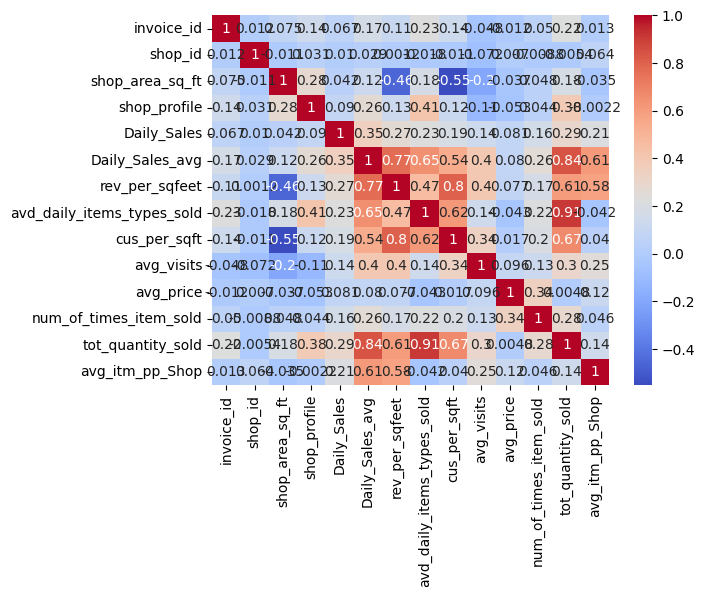

In [65]:
# Create correlation matrix
corr = cleanedDF.corr()

# # Set figure size
# plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Micro Data set

In [66]:
merged_df.head(50)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,ORANGE BARLEY 1.5L,2021-12-11,147,57272,8,220,2,678,2,440,...,179,16,32,32,0.047198,127,220.000000,7,438,276
1,ORANGE BARLEY 1.5L,2021-12-10,54,97284,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.000000,7,438,276
2,ORANGE BARLEY 1.5L,2021-12-10,2000071,144334,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.000000,7,438,276
3,ORANGE BARLEY 1.5L,2021-12-12,3000280,147572,8,220,1,678,2,220,...,179,16,32,32,0.047198,127,220.000000,7,438,276
4,ORANGE BARLEY 1.5L,2021-12-12,322,88285,8,220,2,678,2,440,...,179,16,32,32,0.047198,127,220.000000,7,438,276
5,TONIC PET 500ML,2021-12-13,484,158179,8,160,2,678,2,320,...,179,16,32,32,0.047198,127,302.222222,21,438,276
6,TONIC PET 500ML,2021-12-11,270,52365,8,160,2,678,2,320,...,179,16,32,32,0.047198,127,302.222222,21,438,276
7,TONIC PET 500ML,2021-12-11,5000136,26156,8,160,1,678,2,160,...,179,16,32,32,0.047198,127,302.222222,21,438,276
8,TONIC PET 500ML,2021-12-11,280,152893,8,320,2,678,2,640,...,179,16,32,32,0.047198,127,302.222222,21,438,276
9,TONIC PET 500ML,2021-12-10,1000077,71176,8,320,2,678,2,640,...,179,16,32,32,0.047198,127,302.222222,21,438,276


In [67]:
# # remove last word from each value in the column
# merged_df['item_description'] = merged_df['item_description'].str.rsplit(' ', 1).str[0]

### Make features from avrg item prices for each shoop

In [68]:
# Calculate average price for each item type sold by each shop
avg_price = merged_df.groupby(['shop_id', 'item_description'])['avg_price'].mean().reset_index()
# Rename 'price' column to 'avg_price'
avg_price = avg_price.rename(columns={'avg_price': 'avg_price'})


In [69]:
avg_price

,shop_id,item_description,avg_price
0,1,BOTTLED DRINKING WATER 1.5L,117.500000
1,1,BOTTLED DRINKING WATER 500ML,92.421875
2,1,CREAM SODA 1.5L,291.789474
3,1,CREAM SODA 1L,150.000000
4,1,CREAM SODA 500ML,115.217391
...,...,...,...
4293,127,SODA 500ML,170.860215
4294,127,SODA PET 1.5L,278.750000
4295,127,STRAWBERRY MILK 180ML,131.250000
4296,127,TONIC PET 500ML,571.460674


In [70]:
# pivot the dataframe to make item_description values as columns
pivoted_df_pps = avg_price.pivot(index='shop_id', columns='item_description', values='avg_price')

# fill NaN values with 0
pivoted_df_pps.fillna(0, inplace=True)

# resetting the index
pivoted_df_pps = pivoted_df_pps.reset_index()

In [71]:
# # rename every column except the first two columns with an incrementing value
# for i, col in enumerate(pivoted_df_pps.columns[1:], start=1):
#     pivoted_df_pps = pivoted_df_pps.rename(columns={col: f'itm_{i}_pp_Shop'})

In [72]:
pivoted_df_pps.head(10)

item_description,shop_id,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,1,117.500000,92.421875,0.0,291.789474,150.000000,115.217391,178.846154,230.909091,301.250000,...,266.725664,240.625000,195.000000,106.250000,123.275862,93.661972,319.210526,109.642857,319.444444,332.307692
1,2,101.718750,90.416667,0.0,365.040323,161.250000,123.684211,194.505495,227.333333,323.500000,...,289.702970,265.294118,207.692308,106.976744,173.593750,104.247312,275.268293,116.666667,269.527027,360.000000
2,3,104.000000,55.398773,0.0,330.683230,218.750000,123.129252,192.187500,200.869565,313.064516,...,269.500000,247.076923,150.000000,129.629630,175.576923,93.669065,264.621849,112.000000,243.030303,295.714286
3,4,85.365854,58.782051,0.0,318.043478,168.181818,133.333333,180.555556,243.913043,306.551724,...,286.835443,237.741935,177.272727,133.333333,129.206349,99.545455,210.693069,141.842105,274.303797,294.545455
4,5,102.741935,58.333333,0.0,259.520958,159.375000,107.299270,171.875000,235.714286,338.730159,...,243.076923,254.736842,168.750000,111.428571,131.639344,84.000000,236.033058,131.428571,338.333333,436.153846
5,6,85.098039,69.045455,0.0,293.743017,150.000000,117.857143,179.411765,276.000000,331.176471,...,267.948718,242.647059,150.000000,141.379310,138.875000,105.813953,295.044248,132.391304,224.929577,391.034483
6,7,88.148148,93.981481,0.0,376.792873,153.061224,119.014085,196.460177,222.777778,289.166667,...,283.786982,271.333333,150.000000,119.148936,137.017544,100.074074,200.312500,123.529412,312.560976,270.000000
7,8,396.666667,134.166667,102.5,308.000000,150.000000,100.000000,214.285714,0.000000,435.000000,...,220.000000,220.000000,0.000000,150.000000,125.714286,93.333333,280.000000,122.500000,302.222222,0.000000
8,9,97.777778,52.415459,0.0,268.320413,162.162162,117.857143,186.486486,210.000000,326.458333,...,271.049724,250.841121,166.666667,100.000000,134.146341,84.218750,208.987342,140.000000,204.383562,294.545455
9,10,106.707317,62.553191,0.0,260.571429,159.677419,114.583333,161.718750,238.307692,340.434783,...,256.991150,225.866667,150.000000,106.818182,161.071429,96.333333,219.939024,148.333333,253.643411,304.838710


### create features Num of times each item sold by each shop

In [73]:
# Calculate average price for each item type sold by each shop
num_of_times_item_sold = merged_df.groupby(['shop_id', 'item_description'])['num_of_times_item_sold'].mean().reset_index()
# Rename 'price' column to 'num_of_times_item_sold'
num_of_times_item_sold = num_of_times_item_sold.rename(columns={'num_of_times_item_sold': 'num_of_times_item_sold'})


In [74]:
# pivot the dataframe to make item_description values as columns
pivoted_df_itc = num_of_times_item_sold.pivot(index='shop_id', columns='item_description', values='num_of_times_item_sold')

# fill NaN values with 0
pivoted_df_itc.fillna(0, inplace=True)

# resetting the index
pivoted_df_itc = pivoted_df_itc.reset_index()

In [75]:
# # rename every column except the first two columns with an incrementing value
# for i, col in enumerate(pivoted_df_itc.columns[1:], start=1):
#     pivoted_df_itc = pivoted_df_itc.rename(columns={col: f'itm_{i}_countP_Shop'})

In [76]:
pivoted_df_itc.head(10)

item_description,shop_id,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,1,63.0,201.0,0.0,355.0,26.0,79.0,90.0,24.0,33.0,...,199.0,53.0,20.0,27.0,99.0,135.0,97.0,26.0,130.0,21.0
1,2,121.0,380.0,0.0,1094.0,64.0,404.0,167.0,91.0,66.0,...,385.0,182.0,25.0,64.0,272.0,366.0,453.0,53.0,330.0,53.0
2,3,136.0,356.0,0.0,634.0,99.0,260.0,218.0,41.0,102.0,...,279.0,103.0,10.0,48.0,224.0,279.0,271.0,75.0,279.0,33.0
3,4,74.0,169.0,0.0,550.0,59.0,191.0,96.0,49.0,46.0,...,300.0,97.0,19.0,63.0,230.0,290.0,179.0,95.0,184.0,49.0
4,5,119.0,217.0,0.0,562.0,48.0,225.0,160.0,67.0,111.0,...,222.0,128.0,15.0,50.0,217.0,184.0,242.0,122.0,227.0,56.0
5,6,85.0,276.0,0.0,662.0,61.0,199.0,176.0,68.0,80.0,...,278.0,111.0,25.0,57.0,148.0,179.0,268.0,117.0,137.0,58.0
6,7,97.0,179.0,0.0,1020.0,82.0,246.0,215.0,65.0,35.0,...,312.0,107.0,52.0,81.0,107.0,257.0,175.0,36.0,208.0,28.0
7,8,18.0,25.0,4.0,43.0,7.0,21.0,31.0,0.0,7.0,...,7.0,5.0,0.0,4.0,14.0,20.0,8.0,8.0,21.0,0.0
8,9,123.0,427.0,0.0,672.0,61.0,245.0,203.0,56.0,73.0,...,330.0,173.0,16.0,109.0,145.0,219.0,144.0,53.0,135.0,51.0
9,10,168.0,212.0,0.0,666.0,48.0,243.0,105.0,128.0,78.0,...,394.0,115.0,8.0,68.0,277.0,395.0,309.0,112.0,261.0,49.0


### rest

In [77]:
cleanedDF

,invoice_id,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,147,8,678,2,65375,37040.173913,179,16,0.047198,127,220.0,7,438,276
1,54,8,678,2,27435,37040.173913,179,16,0.047198,127,220.0,7,438,276
2,2000071,8,678,2,27435,37040.173913,179,16,0.047198,127,220.0,7,438,276
3,3000280,8,678,2,8530,37040.173913,179,16,0.047198,127,220.0,7,438,276
4,322,8,678,2,8530,37040.173913,179,16,0.047198,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,7023229,72,617,3,17725,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394476,1478119,72,617,3,14250,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394477,3400566,72,617,3,25505,41364.617086,3907,22,0.077796,157,150.0,11,6888,349
394478,4286907,72,617,3,30320,41364.617086,3907,22,0.077796,157,150.0,11,6888,349


In [78]:
# create a new smaller dataframe by grouping all the rows by shop_id and taking the mean of each column exept shop profile column to the corresponding shop id column
microDF=cleanedDF.groupby('shop_id').mean().reset_index().drop(['shop_profile','invoice_id','Daily_Sales'], axis=1)

In [79]:
profiles=cleanedDF[['shop_id','shop_profile']].drop_duplicates().sort_values(by=['shop_id']).reset_index().drop(['index'], axis=1)

In [80]:
profiles

,shop_id,shop_profile
0,1,1
1,2,0
2,3,3
3,4,1
4,5,1
...,...,...
119,123,2
120,124,3
121,125,3
122,126,2


In [81]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,1,580.0,19624.777051,1729.0,14.0,0.037931,166.0,226.510271,216.273620,3229.0,310.0
1,2,637.0,51150.466469,4153.0,20.0,0.086342,170.0,244.660896,556.100849,7993.0,330.0
2,3,810.0,32080.320166,2059.0,19.0,0.053086,162.0,221.642485,322.160555,5945.0,280.0
3,4,516.0,27385.164966,2753.0,19.0,0.077519,181.0,218.071279,358.786961,5521.0,257.0
4,5,617.0,29554.439489,2610.0,20.0,0.072934,171.0,215.048847,346.087834,5994.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...
119,123,735.0,15805.588585,1123.0,14.0,0.031293,163.0,213.268222,180.355775,3075.0,268.0
120,124,606.0,44868.428805,4205.0,22.0,0.079208,174.0,222.914553,330.705194,7379.0,345.0
121,125,1028.0,19419.339888,940.0,13.0,0.017510,183.0,219.776200,158.727947,3255.0,296.0
122,126,328.0,29741.977432,4949.0,18.0,0.112805,170.0,213.230777,262.533612,5454.0,297.0


In [82]:
microDF=(pd.merge(microDF, profiles, on='shop_id', how='left')).round(0).astype(int)

In [83]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,shop_profile
0,1,580,19625,1729,14,0,166,227,216,3229,310,1
1,2,637,51150,4153,20,0,170,245,556,7993,330,0
2,3,810,32080,2059,19,0,162,222,322,5945,280,3
3,4,516,27385,2753,19,0,181,218,359,5521,257,1
4,5,617,29554,2610,20,0,171,215,346,5994,268,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,0,163,213,180,3075,268,2
120,124,606,44868,4205,22,0,174,223,331,7379,345,3
121,125,1028,19419,940,13,0,183,220,159,3255,296,3
122,126,328,29742,4949,18,0,170,213,263,5454,297,2


In [84]:
# # Create scatter plot grid
# sns.pairplot(microDF, kind="scatter")

# # Display the plot
# plt.show()

In [85]:
# microDF=(pd.merge(microDF, pivoted_df_pps, on='shop_id', how='left')).round(0).astype(int)

In [86]:
microDF=(pd.merge(microDF, pivoted_df_itc, on='shop_id', how='left')).round(0).astype(int)

In [87]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,cus_per_sqft,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,1,580,19625,1729,14,0,166,227,216,3229,...,199,53,20,27,99,135,97,26,130,21
1,2,637,51150,4153,20,0,170,245,556,7993,...,385,182,25,64,272,366,453,53,330,53
2,3,810,32080,2059,19,0,162,222,322,5945,...,279,103,10,48,224,279,271,75,279,33
3,4,516,27385,2753,19,0,181,218,359,5521,...,300,97,19,63,230,290,179,95,184,49
4,5,617,29554,2610,20,0,171,215,346,5994,...,222,128,15,50,217,184,242,122,227,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,0,163,213,180,3075,...,145,67,12,33,113,124,94,93,102,36
120,124,606,44868,4205,22,0,174,223,331,7379,...,254,118,15,61,239,412,350,260,393,85
121,125,1028,19419,940,13,0,183,220,159,3255,...,56,15,23,40,198,337,235,7,274,25
122,126,328,29742,4949,18,0,170,213,263,5454,...,287,59,0,62,302,442,216,160,407,43


### Cleanup microDF

In [181]:

# # drop the columns withlow MI scores
# microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
#                       'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop','itm_20_countP_Shop',
#                       'itm_8_countP_Shop','itm_31_countP_Shop','itm_21_countP_Shop','itm_14_countP_Shop','itm_24_countP_Shop','itm_16_countP_Shop','itm_28_countP_Shop',
#                       'itm_36_countP_Shop','avd_daily_items_types_sold'], axis=1)


# # drop the columns withlow MI scores
# microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
#                       'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop'], axis=1)

# drop the columns withlow MI scores
microDF=microDF.drop(['STRAWBERRY MILK 180ML','CREAM SODA 1L','cus_per_sqft','LEMONADE 1.5L','ORANGE CRUSH 1L',
                      'ORANGE CRUSH 1.5L','GINGER BEER 1.5L','LIME CRUSH JUICE 1L','ORANGE CRUSH 1.5L','CHOCOLATE MILK 180ML','FIT O MANGO 200ML','FIT O MIXED FRUIT 200ML'], axis=1)

In [182]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,1,580,19625,1729,14,166,227,216,3229,310,...,194,12,13,199,27,99,135,97,130,21
1,2,637,51150,4153,20,170,245,556,7993,330,...,725,18,67,385,64,272,366,453,330,53
2,3,810,32080,2059,19,162,222,322,5945,280,...,329,19,30,279,48,224,279,271,279,33
3,4,516,27385,2753,19,181,218,359,5521,257,...,237,18,43,300,63,230,290,179,184,49
4,5,617,29554,2610,20,171,215,346,5994,268,...,476,25,35,222,50,217,184,242,227,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,163,213,180,3075,268,...,149,10,27,145,33,113,124,94,102,36
120,124,606,44868,4205,22,174,223,331,7379,345,...,226,19,78,254,61,239,412,350,393,85
121,125,1028,19419,940,13,183,220,159,3255,296,...,44,4,37,56,40,198,337,235,274,25
122,126,328,29742,4949,18,170,213,263,5454,297,...,174,0,56,287,62,302,442,216,407,43


## Split To Test and Train Data

In [183]:
# Split the DataFrame into two based on column B
Eval_mic_DF = microDF[microDF['shop_profile'] == 0].drop(['shop_profile'], axis=1).reset_index().drop(['index'], axis=1)
Train_mic_DF = microDF[microDF['shop_profile'] != 0].reset_index().drop(['index'], axis=1)

In [184]:
Train_mic_DF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,1,580,19625,1729,14,166,227,216,3229,310,...,194,12,13,199,27,99,135,97,130,21
1,3,810,32080,2059,19,162,222,322,5945,280,...,329,19,30,279,48,224,279,271,279,33
2,4,516,27385,2753,19,181,218,359,5521,257,...,237,18,43,300,63,230,290,179,184,49
3,5,617,29554,2610,20,171,215,346,5994,268,...,476,25,35,222,50,217,184,242,227,56
4,6,676,28440,2286,19,167,216,398,5692,271,...,298,13,36,278,57,148,179,268,137,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,123,735,15806,1123,14,163,213,180,3075,268,...,149,10,27,145,33,113,124,94,102,36
96,124,606,44868,4205,22,174,223,331,7379,345,...,226,19,78,254,61,239,412,350,393,85
97,125,1028,19419,940,13,183,220,159,3255,296,...,44,4,37,56,40,198,337,235,274,25
98,126,328,29742,4949,18,170,213,263,5454,297,...,174,0,56,287,62,302,442,216,407,43


In [185]:
# Calculate average price for each item type sold by each shop
items = merged_df.groupby(['item_description'])['item_price'].sum().reset_index()

# order the data frame b the item_price column
items=items.sort_values(by=['item_price'], ascending=False).reset_index().drop(['index'], axis=1)

# # Rename 'price' column to 'avg_price'
# items = items.rename(columns={'avg_price': 'avg_price'})

In [186]:
# remove last word from each value in the column
items['item_description'] = items['item_description'].str.rsplit(' ', 1).str[0]

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\879735206.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  items['item_description'] = items['item_description'].str.rsplit(' ', 1).str[0]


In [187]:
# Calculate average price for each item type sold by each shop
items = items.groupby(['item_description'])['item_price'].sum().reset_index()

# order the data frame b the item_price column
items=items.sort_values(by=['item_price'], ascending=False).reset_index().drop(['index'], axis=1)

In [188]:
items

,item_description,item_price
0,GINGER BEER,19177440
1,CREAM SODA,13823720
2,NECTO,6850570
3,FIT O ORANGE,6530040
4,ORANGE BARLEY,6220280
5,LEMONADE,4277380
6,TONIC PET,3935030
7,SODA PET,3716960
8,SODA,3662020
9,FIT O MIXED FRUIT,3189490


In [189]:
item_list=items['item_description'].tolist()

In [190]:
# for item in item_list:
#     # create the bar plot
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.bar(Train_mic_DF['shop_id'], Train_mic_DF[f'{item}'])

#     # set x-axis labels
#     ax.set_xticks(Train_mic_DF['shop_id'])
#     ax.set_xticklabels(Train_mic_DF[f'{item}'], rotation=90)

#     # set plot title and axis labels
#     ax.set_title('Sold Amount')
#     ax.set_xlabel('shop_id')
#     ax.set_ylabel(f'{item}')

# plt.show()

In [191]:
# # Create bar chart
# plt.bar(df['Name'], df['Value'])

# # Add labels
# plt.xlabel('Name')
# plt.ylabel('Value')
# plt.title('Bar Chart')

# # Show plot
# plt.show()

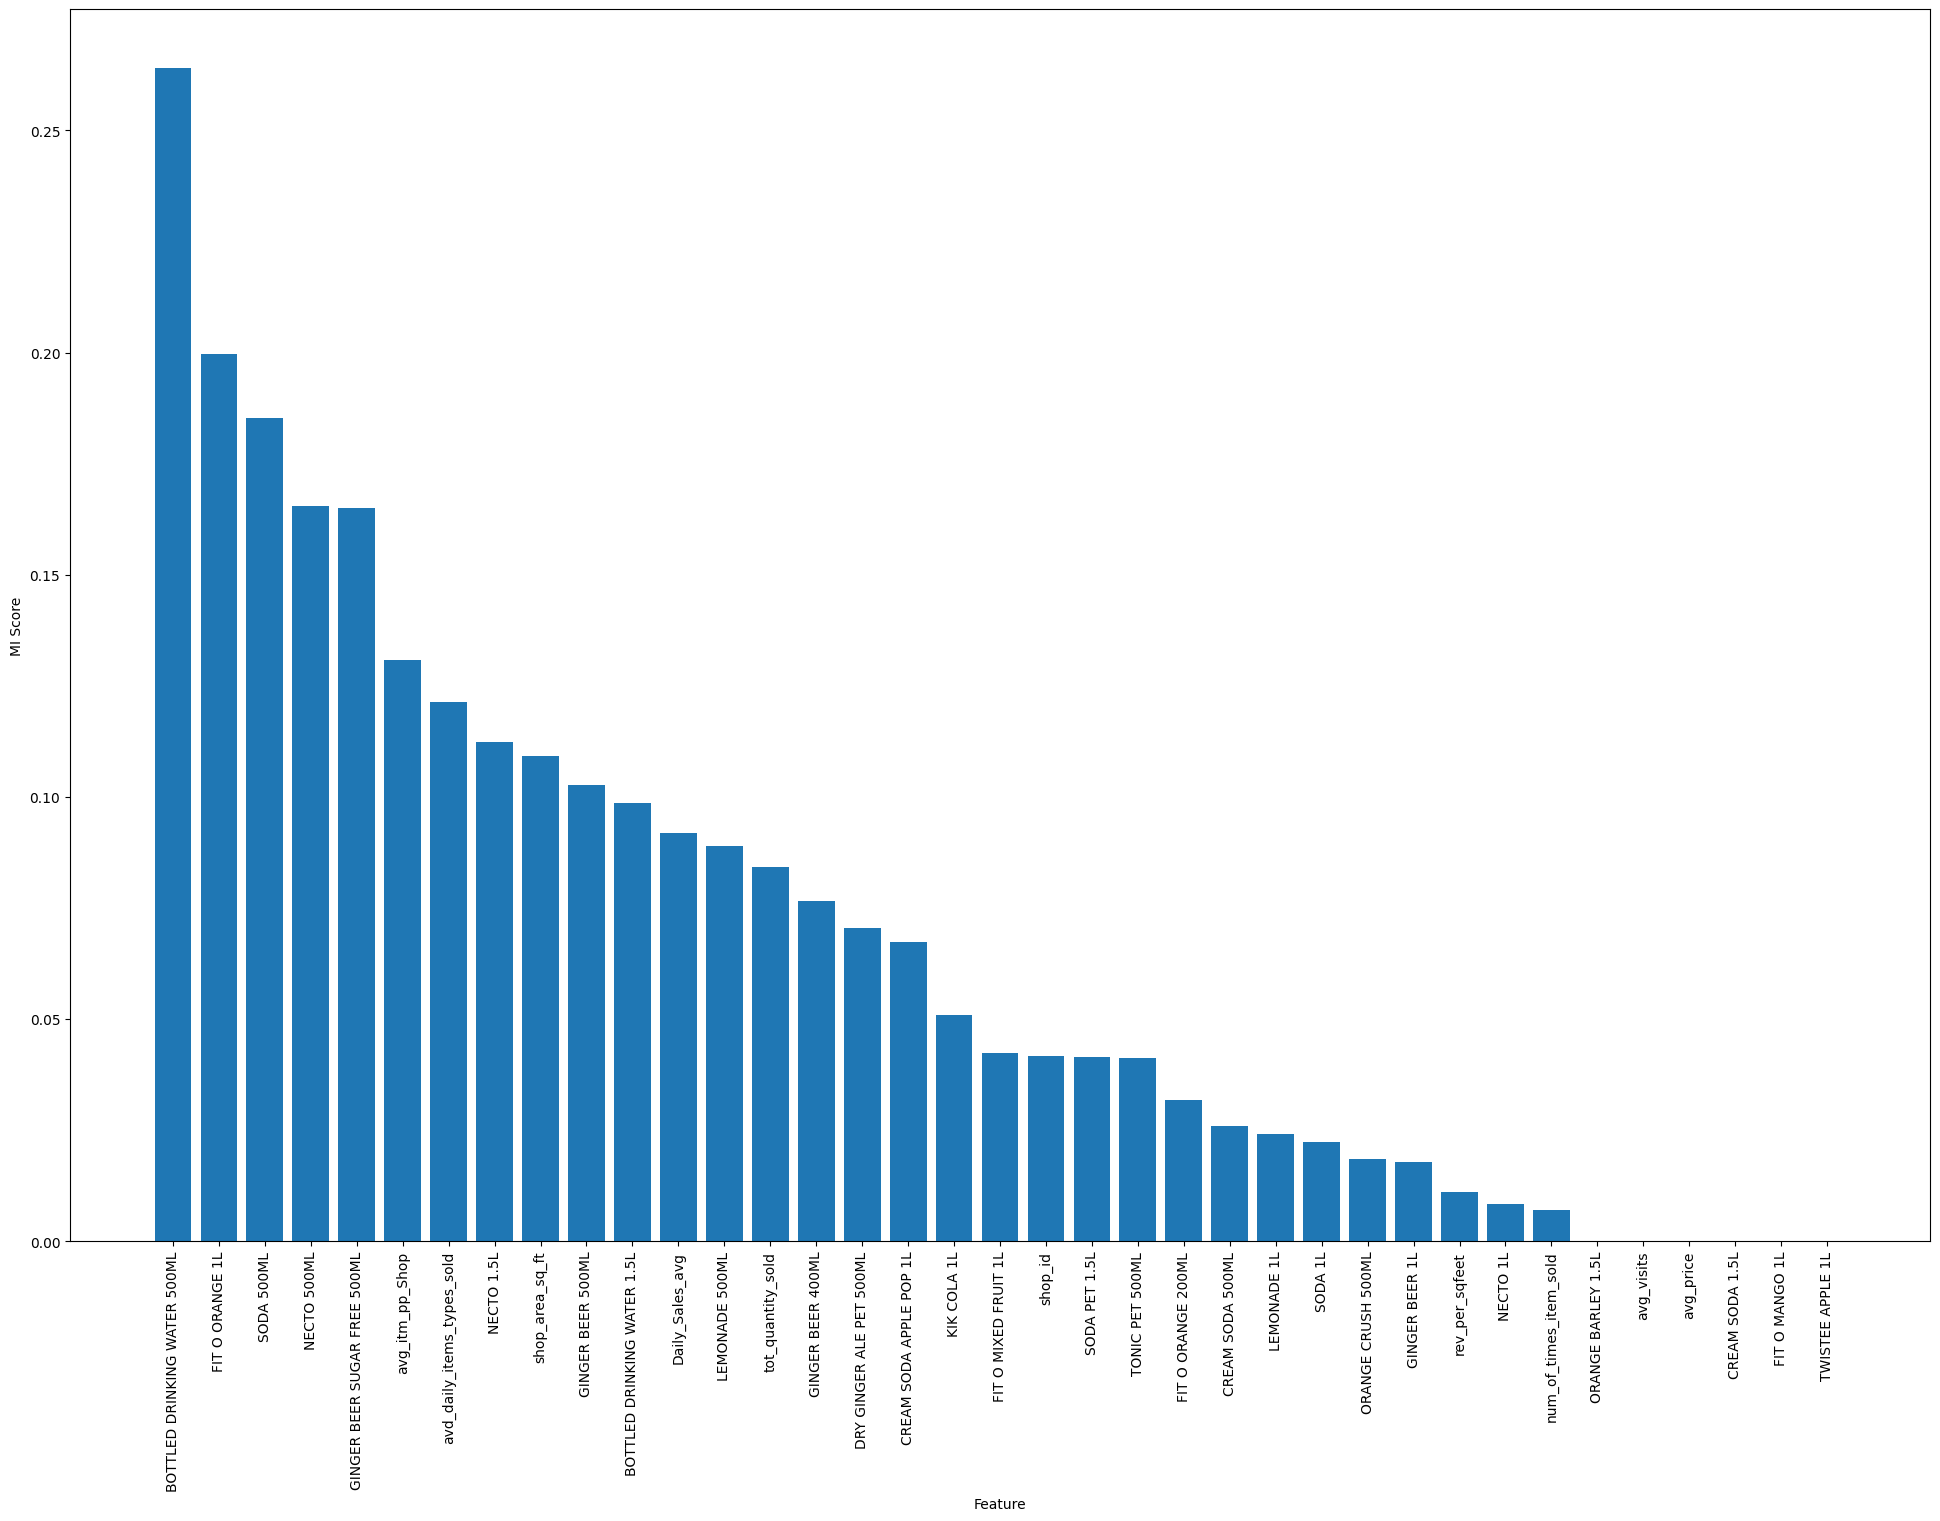

In [192]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate the target variable
X = Train_mic_DF.drop(['shop_profile'], axis=1)
y = Train_mic_DF['shop_profile']

# Compute MI scores
mi_scores = mutual_info_classif(X, y)

# Convert to DataFrame and sort by MI score
mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# Plot bar chart of MI scores
plt.figure(figsize=(24,16))
plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('MI Score')
plt.show()

In [193]:
items

,item_description,item_price
0,GINGER BEER,19177440
1,CREAM SODA,13823720
2,NECTO,6850570
3,FIT O ORANGE,6530040
4,ORANGE BARLEY,6220280
5,LEMONADE,4277380
6,TONIC PET,3935030
7,SODA PET,3716960
8,SODA,3662020
9,FIT O MIXED FRUIT,3189490


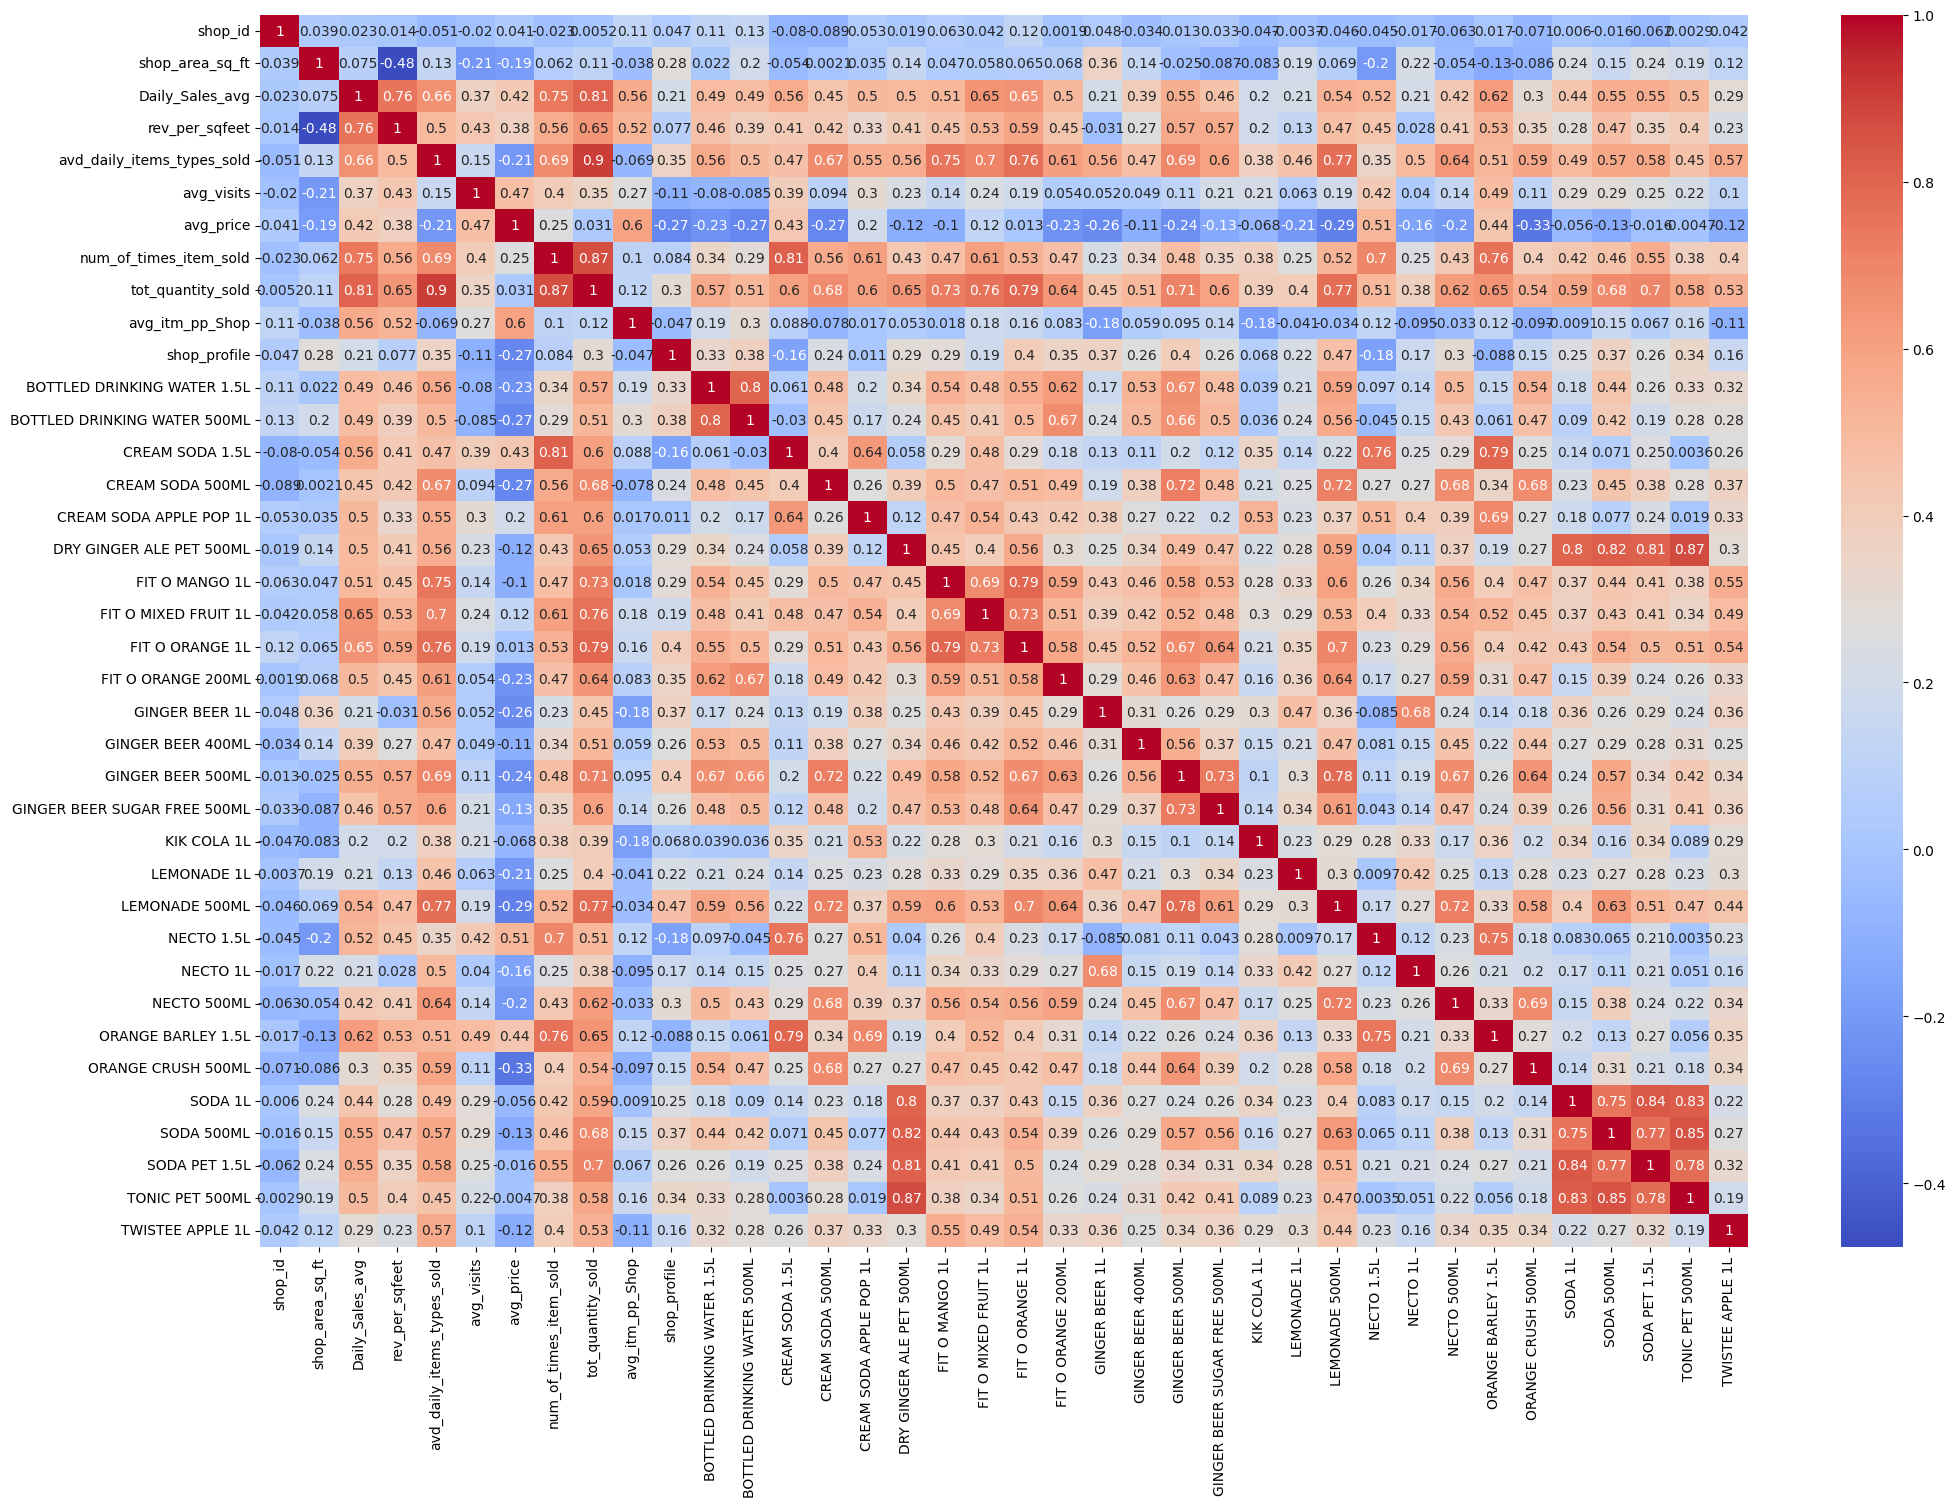

In [194]:
# Create correlation matrix
corr = microDF.corr()

# Set figure size
plt.figure(figsize=(24, 16))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [195]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

train_data_mic, test_data_mic = train_test_split(Train_mic_DF, test_size=0.2)

In [196]:
test_data_mic=test_data_mic.reset_index(drop=True)
train_data_mic=train_data_mic.reset_index(drop=True)

In [197]:
# remove store id from the training and testing sets

test_data_mic_noID = test_data_mic.drop(['shop_id'], axis=1)
train_data_mic_noID = train_data_mic.drop(['shop_id'], axis=1)

In [198]:
# Split data into training and test sets
X_train=train_data_mic_noID.drop('shop_profile', axis=1)
y_train=train_data_mic_noID['shop_profile']
X_test=test_data_mic_noID.drop('shop_profile', axis=1)
y_test=test_data_mic_noID['shop_profile']

In [199]:
X_test

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,BOTTLED DRINKING WATER 1.5L,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,328,29742,4949,18,170,213,263,5454,297,140,...,174,0,56,287,62,302,442,216,407,43
1,617,39149,3470,21,164,226,408,7184,297,299,...,492,16,52,438,103,133,233,179,215,101
2,617,44714,3925,21,177,226,645,7789,310,115,...,507,27,48,388,72,145,223,283,183,59
3,720,17080,1103,17,163,200,236,3599,220,42,...,167,23,25,124,28,126,117,105,124,20
4,551,63126,6575,25,185,237,503,10540,343,488,...,448,31,74,434,75,207,707,311,498,66
5,676,28440,2286,19,167,216,398,5692,271,85,...,298,13,36,278,57,148,179,268,137,58
6,617,29696,2530,21,166,203,388,6554,238,168,...,312,14,59,394,68,277,395,309,261,49
7,676,28790,2375,18,164,220,299,5366,299,93,...,286,26,32,316,47,174,289,292,275,59
8,776,47207,3334,23,176,215,437,8824,293,173,...,405,23,131,427,74,298,519,688,421,71
9,617,57321,5099,24,186,221,490,10122,310,206,...,293,27,74,403,91,448,732,798,831,89


In [200]:
X_train

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,BOTTLED DRINKING WATER 1.5L,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,676,49744,3463,19,195,251,540,7356,318,122,...,617,13,30,691,52,224,233,184,118,41
1,441,22557,2789,18,184,202,255,4993,246,123,...,231,14,64,264,82,92,290,112,131,35
2,631,32955,2736,20,198,212,274,6295,274,155,...,128,18,77,170,93,328,433,301,438,40
3,470,43278,4583,17,184,270,429,5837,369,157,...,687,0,45,376,34,144,244,340,405,52
4,678,37040,179,16,127,222,32,438,276,18,...,18,2,2,7,4,14,20,8,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,617,26727,2408,20,179,202,340,6008,247,99,...,294,9,28,331,45,363,431,486,268,55
76,661,41511,3580,24,170,202,457,9166,258,179,...,339,41,51,436,110,494,505,555,545,52
77,676,36624,2994,20,163,222,395,6315,320,196,...,307,23,43,283,69,170,251,242,151,68
78,617,34477,3134,21,161,206,438,6652,290,286,...,242,21,74,325,109,110,179,245,147,67


#### Decition tree

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris



# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score:  0.5625


In [202]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Train the Decision Trees model
dt_model = DecisionTreeClassifier() # criterion= 'gini', max_depth= 3, min_samples_leaf= 3, min_samples_split= 5)
dt_model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 45.00%


In [203]:
from sklearn.metrics import f1_score

# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.00
F1 score for class 1: 0.38
F1 score for class 2: 0.18
Average F1 score: 0.19


c:\Users\gw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


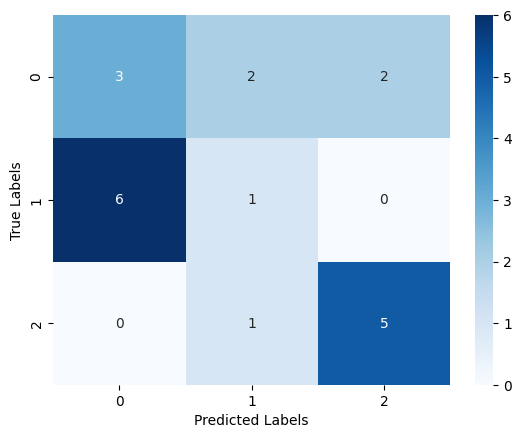

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Big Tune

In [205]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [206]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']

# Define the models to be hyperparameter tuned
models = [
    # {
    #     'name': 'Decision Tree',
    #     'model': DecisionTreeClassifier(),
    #     'params': {
    #         'criterion': ['gini', 'entropy'],
    #         'splitter': ['best', 'random'],
    #         'max_depth': [3, 5, 7, None],
    #         'min_samples_split': [2, 5, 10],
    #         'min_samples_leaf': [1, 2, 4],
    #         'max_features': ['sqrt', 'log2', None]
    #     }
    # },
    # {
    #     'name': 'Naive Bayes',
    #     'model': GaussianNB(),
    #     'params': {
    #         'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    #     }
    # },
    # {
    #     'name': 'Support Vector Machine',
    #     'model': SVC(),
    #     'params': {
    #         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #         'C': [0.1, 1.0, 10.0],
    #         'gamma': ['scale', 'auto']
    #     }
    # },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    # {
    #     'name': 'Logistic Regression',
    #     'model': LogisticRegression(),
    #     'params': {
    #         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #         'C': [0.1, 1.0, 10.0],
    #         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #         'max_iter': [100, 500, 1000]
    # }
    # },
    # {
    #     'name': 'K-Nearest Neighbors',
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': [3, 5, 7],
    #         'weights': ['uniform', 'distance'],
    #         'metric': ['euclidean', 'manhattan', 'minkowski']
    # }
    # }

]

# Perform hyperparameter tuning for each model using GridSearchCV
best_model = None
best_score = 0.0
for model_config in models:
    print(f'Tuning {model_config["name"]}...')
    model = model_config['model']
    params = model_config['params']
    custom_grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        n_jobs=-1
    )
    custom_grid_search.fit(X_train, y_train)
    score = custom_grid_search.best_score_
    print(f'Best score for {model_config["name"]}: {score:.4f}')
    print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
    
    # get the best random forrest params
    if model_config['name'] == 'Random Forest':
        best_params_RT = custom_grid_search.best_params_
        best_model_RT= custom_grid_search.best_estimator_   
        
    if score > best_score:
        best_score = score
        best_model = custom_grid_search.best_estimator_
        best_model_name = model_config['name']
        best_model_hyperparams = custom_grid_search.best_params_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy score for the best model: {accuracy:.4f}')
   


Tuning Random Forest...
Best score for Random Forest: 0.6625
Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Test accuracy score for the best model: 0.7500


In [207]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [208]:
# Deleted some features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6625
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.5500
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.5500
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.6375
# Best Parametersfor Random Forest:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
# Test accuracy score for the best model: 0.5000

In [209]:
X_train

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,BOTTLED DRINKING WATER 1.5L,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,676,49744,3463,19,195,251,540,7356,318,122,...,617,13,30,691,52,224,233,184,118,41
1,441,22557,2789,18,184,202,255,4993,246,123,...,231,14,64,264,82,92,290,112,131,35
2,631,32955,2736,20,198,212,274,6295,274,155,...,128,18,77,170,93,328,433,301,438,40
3,470,43278,4583,17,184,270,429,5837,369,157,...,687,0,45,376,34,144,244,340,405,52
4,678,37040,179,16,127,222,32,438,276,18,...,18,2,2,7,4,14,20,8,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,617,26727,2408,20,179,202,340,6008,247,99,...,294,9,28,331,45,363,431,486,268,55
76,661,41511,3580,24,170,202,457,9166,258,179,...,339,41,51,436,110,494,505,555,545,52
77,676,36624,2994,20,163,222,395,6315,320,196,...,307,23,43,283,69,170,251,242,151,68
78,617,34477,3134,21,161,206,438,6652,290,286,...,242,21,74,325,109,110,179,245,147,67


In [210]:
X_test

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,BOTTLED DRINKING WATER 1.5L,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,328,29742,4949,18,170,213,263,5454,297,140,...,174,0,56,287,62,302,442,216,407,43
1,617,39149,3470,21,164,226,408,7184,297,299,...,492,16,52,438,103,133,233,179,215,101
2,617,44714,3925,21,177,226,645,7789,310,115,...,507,27,48,388,72,145,223,283,183,59
3,720,17080,1103,17,163,200,236,3599,220,42,...,167,23,25,124,28,126,117,105,124,20
4,551,63126,6575,25,185,237,503,10540,343,488,...,448,31,74,434,75,207,707,311,498,66
5,676,28440,2286,19,167,216,398,5692,271,85,...,298,13,36,278,57,148,179,268,137,58
6,617,29696,2530,21,166,203,388,6554,238,168,...,312,14,59,394,68,277,395,309,261,49
7,676,28790,2375,18,164,220,299,5366,299,93,...,286,26,32,316,47,174,289,292,275,59
8,776,47207,3334,23,176,215,437,8824,293,173,...,405,23,131,427,74,298,519,688,421,71
9,617,57321,5099,24,186,221,490,10122,310,206,...,293,27,74,403,91,448,732,798,831,89


In [211]:
Eval_mic_DF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,...,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,TONIC PET 500ML,TWISTEE APPLE 1L
0,2,637,51150,4153,20,170,245,556,7993,330,...,725,18,67,385,64,272,366,453,330,53
1,19,411,42030,5047,18,180,255,487,6368,325,...,591,0,72,602,85,131,179,156,135,65
2,23,617,38922,3719,20,167,240,428,6482,353,...,389,34,36,430,67,120,229,403,213,38
3,24,676,21074,1751,17,160,210,253,4463,265,...,328,12,34,217,47,129,116,185,128,35
4,29,597,32387,2837,19,168,222,346,5994,282,...,271,18,77,300,63,137,231,173,154,76
5,30,530,51396,4875,20,208,252,385,6848,377,...,522,14,57,714,84,204,201,223,249,38
6,38,411,26163,3234,17,166,213,321,5145,258,...,447,0,61,279,95,130,163,149,167,46
7,44,715,22138,1563,15,158,211,264,4200,266,...,149,25,41,217,36,373,376,358,280,30
8,46,545,48683,4572,19,184,235,366,6184,402,...,456,30,38,229,73,232,272,320,302,15
9,50,411,42218,5191,18,208,248,585,6837,312,...,425,0,42,565,62,217,245,291,201,38


In [212]:
Eval_mic_DF_noID=Eval_mic_DF.drop('shop_id', axis=1)

In [213]:
# with all the features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6500
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.6375
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.6125
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.7125
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.6625
# Best Parametersfor Logistic Regression:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# Tuning K-Nearest Neighbors...
# Best score for K-Nearest Neighbors: 0.5500
# Best Parametersfor K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.4500

In [214]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']


# Define the logistic regression model
model_random = RandomForestClassifier(**best_params_RT)
# model_random=best_model_RT

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)


accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))

0.7


##### use hyper param best model instead

In [215]:
# # use hyper param best model instead

# # Split data into training and test sets
# X_train = train_data_mic_noID.drop('shop_profile', axis=1)
# y_train = train_data_mic_noID['shop_profile']
# X_test = test_data_mic_noID.drop('shop_profile', axis=1)
# y_test = test_data_mic_noID['shop_profile']

# model_random=best_model
# # Train the model on the training data
# model_random.fit(X_train, y_train)



In [216]:
# convert to data frame
predictions_Test_randomforest=model_random.predict(Eval_mic_DF_noID)
predictions_Test_randomforest=pd.DataFrame(predictions_Test_randomforest)

In [217]:
predictions_Test_randomforest

,0
0,3
1,1
2,1
3,1
4,2
5,3
6,1
7,2
8,3
9,1


In [218]:
# concatenate the dataframes
fin_results = pd.concat([Eval_mic_DF['shop_id'], predictions_Test_randomforest], axis=1)

In [219]:
fin_results=fin_results.rename(columns={0: 'shop_profile'})
fin_results=fin_results.rename(columns={'shop_id': 'shop_id_num'})

In [220]:
fin_results['shop_profile'] = fin_results['shop_profile'].replace({3 : 'High', 2:'Moderate', 1 : 'Low'})

In [221]:
fin_results

,shop_id_num,shop_profile
0,2,High
1,19,Low
2,23,Low
3,24,Low
4,29,Moderate
5,30,High
6,38,Low
7,44,Moderate
8,46,High
9,50,Low


In [222]:
test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
test_shop_order=test_shop_order.to_frame()
# rename the column 
test_shop_order=test_shop_order.rename(columns={'shop_id': 'shop_id_num'})

C:\Users\gw\AppData\Local\Temp\ipykernel_14288\2622051205.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [223]:
#concatanate the row shop_id from rawTestDF
test_shop_order=pd.concat([test_shop_order, rawTestDF['shop_id']], axis=1)

In [224]:
# left join final_result with test_shop_order 

test_shop_order=test_shop_order.merge(fin_results, on='shop_id_num', how='left')

In [225]:
print_result=test_shop_order.drop('shop_id_num', axis=1)

In [226]:
print_result

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate
5,SHOP030,High
6,SHOP038,Low
7,SHOP029,Moderate
8,SHOP096,Low
9,SHOP092,Low


In [227]:
# print_result.to_csv('result_day04_01.csv', index=False)

import pandas as pd
import os

# set the desired file name
file_name = 'result_day04.csv'

# check if the file already exists
if os.path.isfile(file_name):
    # if it exists, add an incrementing number to the file name
    i = 1
    while os.path.isfile(f"{file_name.split('.')[0]}_{i}.csv"):
        i += 1
    file_name = f"{file_name.split('.')[0]}_{i}.csv"

# write the DataFrame to a CSV file
print_result.to_csv(file_name, index=False)


In [228]:
from sklearn.metrics import f1_score
y_pred=predictions
# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.67
F1 score for class 1: 0.60
F1 score for class 2: 0.83
Average F1 score: 0.70


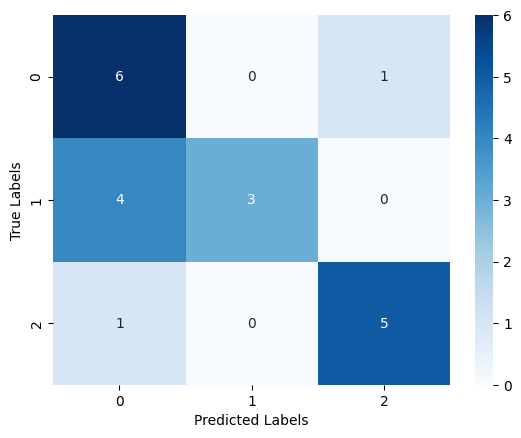

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Huge data Set

## Split To Test and Train Data

In [230]:
# # Split the DataFrame into two based on column B
# TestDF = cleanedDF[cleanedDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
# TrainDF = cleanedDF[cleanedDF['shop_profile'] != 0]

In [231]:
# # reset index
# TestDF=TestDF.reset_index(drop=True)
# TrainDF=TrainDF.reset_index(drop=True)

In [232]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Separate the target variable
# X = TrainDF.drop(['shop_profile'], axis=1)
# y = TrainDF['shop_profile']

# # Compute MI scores
# mi_scores = mutual_info_classif(X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [233]:
# from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# PCA_X = pca.fit_transform(X.drop(['shop_id'], axis=1))

# # Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(PCA_X.shape[1])]
# PCA_X = pd.DataFrame(PCA_X, columns=component_names)

# PCA_X = pd.concat([PCA_X, X['shop_id']], axis=1)


In [234]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Compute MI scores
# mi_scores = mutual_info_classif(PCA_X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': PCA_X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [235]:
# X=PCA_X

In [236]:
# cleanedDF

In [237]:
# # Split Fulldata into training and testing sets
# from sklearn.model_selection import train_test_split

# column_name = 'shop_id'
# unique_categories = TrainDF[column_name].nunique()
# categories_in_dataset_1 = int(unique_categories * 0.8)
# categories_in_dataset_2 = unique_categories - categories_in_dataset_1
# dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
# dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

# train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
# test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





# #train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [238]:
# test_data=test_data.reset_index(drop=True)
# train_data=train_data.reset_index(drop=True)

In [239]:
# # remove store id from the training and testing sets

# train_data_noID = train_data.drop(['shop_id'], axis=1)
# test_data_noID = test_data.drop(['shop_id'], axis=1)

## XG boost

In [240]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [241]:

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Set the parameters for grid search
# params = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'objective': ['multi:softmax', 'multi:softprob'],
#     'num_class': [3],
#     'tree_method': ['gpu_hist']
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by grid search
# print(grid_search.best_params_)

# # Train the model using the best hyperparameters found by grid search
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# xg_pred = xgb_model.predict(X_test)

# # Evaluate the model's performance on the test set
# accuracy = np.mean(xg_pred == y_test)
# print('Accuracy:', accuracy)



Best hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}

In [242]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']


# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')

# # fit model to training data
# xgb_model.fit(X_train, y_train)

# # make predictions on test data
# xg_pred = xgb_model.predict(X_test)

# # evaluate performance of model
# mse = mean_squared_error(y_test, xg_pred)
# print('MSE:', mse)

MSE: 0.40624200562803786

In [243]:
# xg_pred=pd.DataFrame(xg_pred, columns=['shop_profile'])

# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# xg_pred['shop_profile'] = xg_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [ ]:
# predicted_res = pd.concat([test_data['shop_id'], pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


In [ ]:
# xg_pred

In [ ]:
# concatenated_df_XG_res = pd.concat([test_data['shop_id'], xg_pred['shop_profile']], axis=1)
# # concatenated_df_XG_res['shop_profile'] = concatenated_df_XG_res['shop_profile'].astype(int)
# # concatenated_df_XG_res['shop_id'] = concatenated_df_XG_res['shop_id'].astype(int)

In [ ]:
# concatenated_df_XG_res

In [ ]:
# expected_df_XG=test_data[['shop_id', 'shop_profile']]

In [ ]:
# expected_df_XG

In [ ]:
# # group by 'group' column and calculate mode of 'value' column
# XG_res_mode_df = concatenated_df_XG_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [ ]:
# XG_res_mode_df

In [ ]:
# group by 'group' column and calculate mode of 'value' column
# XG_exp_mode_df = expected_df_XG.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [ ]:
# XG_exp_mode_df

In [ ]:
# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=XG_exp_mode_df['shop_profile']
# y_pred=XG_res_mode_df['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.47

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()


## Random Forrest

In [ ]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split


# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Initialize the Random Forest classifier
# rfc = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=25)

# # Train the model on the training data
# rfc.fit(X_train, y_train)

# # Predict on the testing data
# RF_pred = rfc.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, RF_pred)
# print("Accuracy:", accuracy)



Accuracy: 0.6433444188624542

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import classification_report

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform a grid search over the parameter grid with cross-validation
# rf_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# rf_cv.fit(X_train, y_train)

# # Print the best parameters found by the grid search
# print("Best Parameters:", rf_cv.best_params_)

# # Predict on the test data using the best model
# RF_pred = rf_cv.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, RF_pred))


In [ ]:
# RF_pred = pd.DataFrame(RF_pred, columns=['shop_profile'])

# predicted_res = pd.concat([test_data['shop_id'], RF_pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.53

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [ ]:
# TestDF

In [ ]:
# X_test

In [ ]:
# Eval_noID=TestDF.drop('shop_id', axis=1)

In [ ]:
# Eval_noID

In [ ]:
# X_Eval=Eval_noID

# # Predict on the evaluation set
# RF_eval_pred = rfc.predict(X_Eval)

In [ ]:
# RF_eval_pred

In [ ]:
# RF_eval_pred = pd.DataFrame(RF_eval_pred, columns=['shop_profile'])

# predicted_eval_res = pd.concat([TestDF['shop_id'], RF_eval_pred['shop_profile']], axis=1)


# pred_Eval_mode = predicted_eval_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [ ]:
# pred_Eval_mode['shop_profile'] = pred_Eval_mode['shop_profile'].replace({1:'High', 2:'Moderate', 3:'Low'})

In [ ]:
# pred_Eval_mode

## Big Tune

In [ ]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data['shop_profile'] = test_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data['shop_profile'] = train_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

# # # Create a custom scoring function
# # def custom_scorer(y_true, y_pred):
# #     selected_testData = test_data.loc[y_pred.index]
# #     # predicted_res = pd.concat([test_data['shop_id'], y_pred['shop_profile']], axis=1)
# #     # merge dataframes on row index
# #     predicted_res = y_pred['shop_profile'].merge(test_data['shop_id'], left_index=True, right_index=True, how='left')
# #     expected_res=selected_testData[['shop_id', 'shop_profile']]

# #     # reset indexes
# #     predicted_res=predicted_res.reset_index(drop=True)
# #     expected_res=expected_res.reset_index(drop=True)
    
# #     predicted_res
# #     expected_res.head(10)
    
# #     pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# #     exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
    
# #     pred_mode.head(10)
# #     exp_mode.head(10)

# #     # import necessary libraries
# #     import pandas as pd
# #     from sklearn.model_selection import train_test_split
# #     from sklearn.tree import DecisionTreeClassifier
# #     from sklearn.metrics import f1_score

# #     y_test=exp_mode['shop_profile']
# #     y_pred=pred_mode['shop_profile']

# #     # calculate the F1 score for each class
# #     f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')
# #     f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# #     f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')

# #     # calculate the average F1 score
# #     f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# #     # print the results
# #     print(f"F1 score for class 0: {f1_class0:.2f}")
# #     print(f"F1 score for class 1: {f1_class1:.2f}")
# #     print(f"F1 score for class 2: {f1_class2:.2f}")
# #     print(f"Average F1 score: {f1_average:.2f}")
    
# #     formatted_f1_average = "{:.4f}".format(f1_average)
# #     print(formatted_f1_average)
    
# #     return formatted_f1_average

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the models to be hyperparameter tuned
# models = [    {'name': 'XGBoost',        
#             'model': XGBClassifier(tree_method='gpu_hist'),        
#             'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1, 0.3],
#             'min_child_weight': [1, 3, 5],
#             'gamma': [0.0, 0.1, 0.2]
#         }
#     },
#     {
#         'name': 'Random Forest',
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4],
#             'max_features': ['sqrt', 'log2']
#         }
#     },
#     {
#         'name': 'Logistic Regression',
#         'model': LogisticRegression(penalty='l2'),
#         'params': {
#             'C': [0.1, 1.0, 10.0],
#             'solver': ['lbfgs', 'liblinear', 'saga'],
#             'max_iter': [100, 500, 1000]
#         }
#     },
#     {
#         'name': 'KNN',
#         'model': KNeighborsClassifier(),
#         'params': {
#             'n_neighbors': [3, 5, 7],
#             'p': [1, 2],
#             'weights': ['uniform', 'distance'],
#             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#         }
#     }
# ]


# # Perform hyperparameter tuning for each model using GridSearchCV
# best_model = None
# best_score = 0.0
# for model_config in models:
#     print(f'Tuning {model_config["name"]}...')
#     model = model_config['model']
#     params = model_config['params']
#     # Create scorer object using custom scoring function
#     # scorer = make_scorer(custom_scorer)

#     custom_grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=params,
#         cv=5,
#         # scoring=scorer,
#         n_jobs=-1
#     )
#     custom_grid_search.fit(X_train, y_train)
#     score = custom_grid_search.best_score_
#     print(f'Best score for {model_config["name"]}: {score:.4f}')
#     print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
#     if score > best_score:
#         best_score = score
#         best_model = custom_grid_search.best_estimator_
#         best_model_name = model_config['name']
#         best_model_hyperparams = custom_grid_search.best_params_

# # Train the best model on the full training set
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Calculate accuracy score on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test accuracy score for the best model: {accuracy:.4f}')


In [ ]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data['shop_profile'] = test_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data['shop_profile'] = train_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [ ]:
# Tuning XGBoost...
# Best score for XGBoost: 0.5472
# Best Parametersfor XGBoost:  {'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50}
# Tuning Random Forest...
# Best score for Random Forest: 0.6070
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.5213
# Best Parametersfor Logistic Regression:  {'C': 10.0, 'max_iter': 100, 'solver': 'liblinear'}
# Tuning KNN...
# Best score for KNN: 0.4415
# Best Parametersfor KNN:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.7184